<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Write and Save Files in Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Write to files using Python libraries


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="write">Writing Files</a></li>
        <li><a href="Append">Appending Files</a></li>
        <li><a href="add">Additional File modes</a></li>
        <li><a href="copy">Copy a File</a></li>
    </ul>

</div>

<hr>


<h2 id="write">Writing Files</h2>


 We can open a file object using the method <code>write()</code> to save the text file to a list. To write to a file, the mode argument must be set to **w**. Let’s write a file **Example2.txt** with the line: **“This is line A”**


In [8]:
# Write line to file
exmp2 = 'c:\\Users\\vitzh\\Desktop\\Example2.txt'
with open(exmp2, 'w') as writefile:
    writefile.write("This is line A")

 We can read the file to see if it worked:


In [9]:
# Read file

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

This is line A


We can write multiple lines:


In [10]:
# Write lines to file

with open(exmp2, 'w') as writefile:
    writefile.write("This is line A\n")
    writefile.write("This is line B\n")

The method <code>.write()</code> works similarly to the method <code>.readline()</code>, except instead of reading a new line it writes a new line. The process is illustrated in the figure. The different colour coding of the grid represents a new line added to the file after each method call.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/images/WriteLine.png" width="500">


You can check the file to see if your results are correct. 


In [11]:
# Check whether write to file

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B



 We write a list to a **.txt** file  as follows:


In [12]:
# Sample list of text

Lines = ["This is line A\n", "This is line B\n", "This is line C\n"]
Lines

['This is line A\n', 'This is line B\n', 'This is line C\n']

In [14]:
# Write the strings in the list to text file

with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'w') as writefile:
    for line in Lines:
        print(line)
        writefile.write(line)

This is line A

This is line B

This is line C



 We can verify the file is written by reading it and printing out the values:  


In [16]:
# Verify if writing to file is successfully executed

with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C



However, note that setting the mode to __w__ overwrites all the existing data in the file.


In [18]:
with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'w') as writefile:
    writefile.write("Overwrite\n")
with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

Overwrite



<hr>
<h2 id="Append">Appending Files</h2>


 We can write to files without losing any of the existing data as follows by setting the mode argument to append: **a**.  You can append a new line as follows:


In [20]:
# Write a new line to text file

with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'a') as testwritefile:
    testwritefile.write("This is line C\n")
    testwritefile.write("This is line D\n")
    testwritefile.write("This is line E\n")

 You can verify the file has changed by running the following cell:


In [21]:
# Verify if the new line is in the text file

with open('c:\\Users\\vitzh\\Desktop\\Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

Overwrite
This is line C
This is line D
This is line E



<hr>
<h2 id="add">Additional modes</h2> 


It's fairly inefficient to open the file in **a** or **w** and then reopen it in **r** to read any lines. Luckily we can access the file in the following modes:
- **r+** : Reading and writing. Cannot truncate the file.
- **w+** : Writing and reading. Truncates the file.
- **a+** : Appending and Reading. Creates a new file, if none exists.
You dont have to dwell on the specifics of each mode for this lab. 


Let's try out the __a+__ mode:


In [ ]:
with open('/Example2.txt', 'a+') as testwritefile:
    testwritefile.write("This is line E\n")
    print(testwritefile.read())

There were no errors but <code>read()</code> also did not output anything. This is because of our location in the file.


Most of the file methods we've looked at work in a certain location in the file. <code>.write() </code> writes at a certain location in the file. <code>.read()</code> reads at a certain location in the file and so on. You can think of this as moving your pointer around in the notepad to make changes at a specific location.


Opening the file in **w** is akin to opening the .txt file, moving your cursor to the beginning of the text file, writing new text and deleting everything that follows.
Whereas opening the file in **a** is similar to opening the .txt file, moving your cursor to the very end and then adding the new pieces of text. <br>
It is often very useful to know where the 'cursor' is in a file and be able to control it. The following methods allow us to do precisely this -
- <code>.tell()</code> - returns the current position in bytes
- <code>.seek(offset,from)</code> - changes the position by 'offset' bytes with respect to 'from'. From can take the value of 0,1,2 corresponding to the beginning, relative to current position and end


Now lets revisit **a+**


In [ ]:
with open('/Example2.txt', 'a+') as testwritefile:
    print("Initial Location: {}".format(testwritefile.tell()))
    
    data = testwritefile.read()
    if (not data):  #empty strings return false in python
            print('Read nothing') 
    else: 
            print(testwritefile.read())
            
    testwritefile.seek(0,0) # move 0 bytes from beginning.
    
    print("\nNew Location : {}".format(testwritefile.tell()))
    data = testwritefile.read()
    if (not data): 
            print('Read nothing') 
    else: 
            print(data)
    
    print("Location after read: {}".format(testwritefile.tell()) )

Finally, a note on the difference between **w+** and **r+**. Both of these modes allow access to read and write methods; however, opening a file in **w+** overwrites it and deletes all pre-existing data. <br>
To work with a file on existing data, use **r+** and **a+**. While using **r+**, it can be useful to add a <code>.truncate()</code> method at the end of your data. This will reduce the file to your data and delete everything that follows. <br>
In the following code block, Run the code as it is first and then run it with the <code>.truncate()</code>.


In [ ]:
with open('/Example2.txt', 'r+') as testwritefile:
    data = testwritefile.readlines()
    testwritefile.seek(0,0) #write at beginning of file
   
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("finished\n")
    #Uncomment the line below
    #testwritefile.truncate()
    testwritefile.seek(0,0)
    print(testwritefile.read())
    

<hr>


<h2 id="copy">Copy a File</h2> 


Let's copy the file **Example2.txt** to the file **Example3.txt**:


In [ ]:
# Copy file to another

with open('/Example2.txt','r') as readfile:
    with open('Example3.txt','w') as writefile:
          for line in readfile:
                writefile.write(line)

We can read the file to see if everything works:


In [ ]:
# Verify if the copy is successfully executed

with open('Example3.txt','r') as testwritefile:
    print(testwritefile.read())

 After reading files, we can also write data into files and save them in different file formats like **.txt, .csv, .xls (for excel files) etc**. You will come across these in further examples


**NOTE:** If you wish to open and view the `example3.txt` file, download this lab [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/PY0101EN-4-2-WriteFile.ipynb) and run it locally on your machine. Then go to the working directory to ensure the `example3.txt` file exists and contains the summary data that we wrote.


<hr>


<h2> Exercise </h2>


Your local university's Raptors fan club maintains a register of its active members on a .txt document. Every month they update the file by removing the members who are not active. You have been tasked with automating this with your Python skills. <br>
Given the file `currentMem`, Remove each member with a 'no' in their Active column. Keep track of each of the removed members and append them to the `exMem` file. Make sure that the format of the original files in preserved.   (*Hint: Do this by reading/writing whole lines and ensuring the header remains* )
<br>
Run the code block below prior to starting the exercise. The skeleton code has been provided for you. Edit only the `cleanFiles` function.


In [ ]:
#Run this prior to starting the exercise
from random import randint as rnd

memReg = 'members.txt'
exReg = 'inactive.txt'
fee =('yes','no')

def genFiles(current,old):
    with open(current,'w+') as writefile: 
        writefile.write('Membership No  Date Joined  Active  \n')
        data = "{:^13}  {:<11}  {:<6}\n"

        for rowno in range(20):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            writefile.write(data.format(rnd(10000,99999),date,fee[rnd(0,1)]))


    with open(old,'w+') as writefile: 
        writefile.write('Membership No  Date Joined  Active  \n')
        data = "{:^13}  {:<11}  {:<6}\n"
        for rowno in range(3):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            writefile.write(data.format(rnd(10000,99999),date,fee[1]))


genFiles(memReg,exReg)


Now that you've run the prerequisite code cell above, which prepared the files for this exercise, you are ready to move on to the implementation.

#### **Exercise:** Implement the cleanFiles function in the code cell below.


In [ ]:
  
'''
The two arguments for this function are the files:
    - currentMem: File containing list of current members
    - exMem: File containing list of old members
    
    This function should remove all rows from currentMem containing 'no' 
    in the 'Active' column and appends them to exMem.
    '''
def cleanFiles(currentMem, exMem):
    # TODO: Open the currentMem file as in r+ mode
        #TODO: Open the exMem file in a+ mode

        #TODO: Read each member in the currentMem (1 member per row) file into a list.
        # Hint: Recall that the first line in the file is the header.

        #TODO: iterate through the members and create a new list of the innactive members

        # Go to the beginning of the currentMem file
        # TODO: Iterate through the members list. 
        # If a member is inactive, add them to exMem, otherwise write them into currentMem

        
    
    pass # Remove this line when done implementation


# The code below is to help you view the files.
# Do not modify this code for this exercise.
memReg = 'members.txt'
exReg = 'inactive.txt'
cleanFiles(memReg,exReg)


headers = "Membership No  Date Joined  Active  \n"
with open(memReg,'r') as readFile:
    print("Active Members: \n\n")
    print(readFile.read())
    
with open(exReg,'r') as readFile:
    print("Inactive Members: \n\n")
    print(readFile.read())
                
    

The code cell below is to verify your solution. Please do not modify the code and run it to test your implementation of `cleanFiles`.


In [ ]:
def testMsg(passed):
    if passed:
       return 'Test Passed'
    else :
       return 'Test Failed'

testWrite = "testWrite.txt"
testAppend = "testAppend.txt" 
passed = True

genFiles(testWrite,testAppend)

with open(testWrite,'r') as file:
    ogWrite = file.readlines()

with open(testAppend,'r') as file:
    ogAppend = file.readlines()

try:
    cleanFiles(testWrite,testAppend)
except:
    print('Error')

with open(testWrite,'r') as file:
    clWrite = file.readlines()

with open(testAppend,'r') as file:
    clAppend = file.readlines()
        
# checking if total no of rows is same, including headers

if (len(ogWrite) + len(ogAppend) != len(clWrite) + len(clAppend)):
    print("The number of rows do not add up. Make sure your final files have the same header and format.")
    passed = False
    
for line in clWrite:
    if  'no' in line:
        passed = False
        print("Inactive members in file")
        break
    else:
        if line not in ogWrite:
            print("Data in file does not match original file")
            passed = False
print ("{}".format(testMsg(passed)))
    



In [6]:
import numpy as np 
c = np.array([1, 3, 5, 7, 9])
c

array([1, 3, 5, 7, 9])

In [9]:
select = [0, 2, 4]
select

[0, 2, 4]

In [10]:
d = c[select]
d

array([1, 5, 9])

In [11]:
c[select] = 200
c

array([200,   3, 200,   7, 200])

In [14]:

import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline  

def Plotvec1(u, z, v):
    
    ax = plt.axes() # to generate the full window axes
    ax.arrow(0, 0, *u, head_width=0.05, color='r', head_length=0.1)# Add an arrow to the  U Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(u + 0.1), 'u')#Adds the text u to the Axes 
    
    ax.arrow(0, 0, *v, head_width=0.05, color='b', head_length=0.1)# Add an arrow to the  v Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(v + 0.1), 'v')#Adds the     здеюеуче(*(м + 0ю1)б эмэ)№Фввы еру еуче м ещ еру Фчуы text v to the Axes 
    
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z + 0.1), 'z')#Adds the text z to the Axes 
    plt.ylim(-2, 2)#set the ylim to bottom(-2), top(2)
    plt.xlim(-2, 2)#set the xlim to left(-2), right(2)


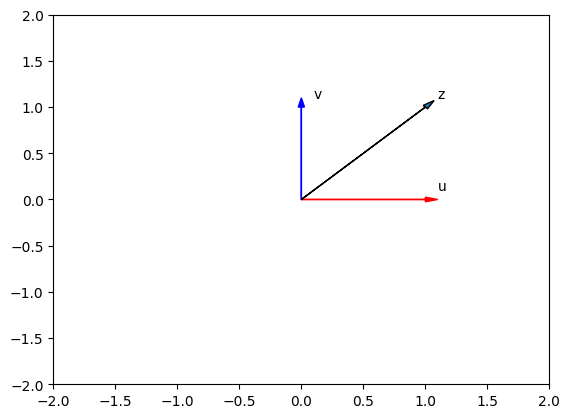

In [16]:
# Plot numpy arrays
u = np.array([1, 0])
v = np.array([0, 1])
z = np.add(u, v)
Plotvec1(u, z, v)

np.linspace(-2, 2, num=5)
x = np.linspace(0, 2*np.pi, num=100)

In [22]:
g=np.linspace(5, 4, num=6)
g


array([5. , 4.8, 4.6, 4.4, 4.2, 4. ])

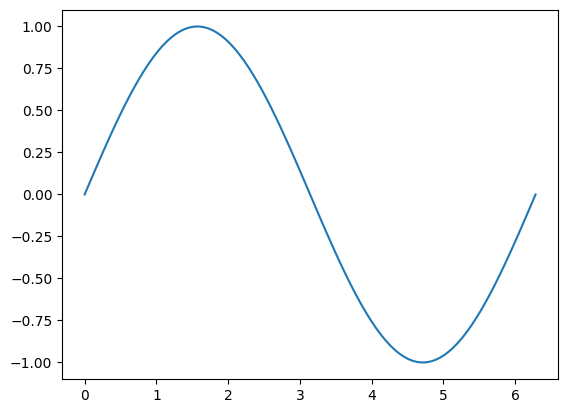

In [23]:

x = np.linspace(0, 2*np.pi, num=100)
y = np.sin(x)
plt.plot(x, y)

<details><summary>Click here for the solution</summary>

```python
def cleanFiles(currentMem,exMem):
    with open(currentMem,'r+') as writeFile: 
        with open(exMem,'a+') as appendFile:
            #get the data
            writeFile.seek(0)
            members = writeFile.readlines()
            #remove header
            header = members[0]
            members.pop(0)
                
            inactive = [member for member in members if ('no' in member)]
            '''
            The above is the same as 

            for member in members:
            if 'no' in member:
                inactive.append(member)
            '''
            #go to the beginning of the write file
            writeFile.seek(0) 
            writeFile.write(header)
            for member in members:
                if (member in inactive):
                    appendFile.write(member)
                else:
                    writeFile.write(member)      
            writeFile.truncate()
                
memReg = 'members.txt'
exReg = 'inactive.txt'
cleanFiles(memReg,exReg)

# code to help you see the files

headers = "Membership No  Date Joined  Active  \n"

with open(memReg,'r') as readFile:
    print("Active Members: \n\n")
    print(readFile.read())
    
with open(exReg,'r') as readFile:
    print("Inactive Members: \n\n")
    print(readFile.read())
    
```

</details>

    


<hr>
<h2>The last exercise!</h2>
<p>Congratulations, you have completed this lesson and hands-on lab in Python. 
<hr>


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>


### Other Contributors
<a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2022-01-10  | 2.1  | Malika  | Removed the readme for GitShare|
| 2020-10-16  | 1.3  | Arjun Swani  |  Added exercise |
| 2020-10-16  | 1.2  | Arjun Swani  |  Added section additional file modes |
| 2020-10-16  | 1.1  | Arjun Swani |  Made append a different section |
| 2020-08-28  | 0.2  | Lavanya  |  Moved lab to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
